In [2]:
import pysodb 
import scanpy as sc
import numpy as np 
from river.river import River
from river.preprocess import seed_everything


seed_everything(42)

sodb = pysodb.SODB()


adata_list = []
label_list = []
width  = []
length = []
for rank in ['E9.5', 'E10.5', 'E11.5',  'E12.5', 'E13.5', 'E14.5', 'E15.5', 'E16.5']:
    experiment = '{}_E1S1.MOSTA'.format(rank)
    adata = sodb.load_experiment('chen2022spatiotemporal', experiment)
    adata = sc.pp.subsample(adata, n_obs=5000, random_state=0, copy=True)
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)
    adata_list.append(adata)
    label_list.append(rank)
    width.append(adata.obsm['spatial'][...,0].max() - adata.obsm['spatial'][...,0].min())
    length.append(adata.obsm['spatial'][...,1].max() - adata.obsm['spatial'][...,1].min())
    

width = np.array(width)
length = np.array(length)

matching_list = []

load experiment[E9.5_E1S1.MOSTA] in dataset[chen2022spatiotemporal]
load experiment[E10.5_E1S1.MOSTA] in dataset[chen2022spatiotemporal]
load experiment[E11.5_E1S1.MOSTA] in dataset[chen2022spatiotemporal]
load experiment[E12.5_E1S1.MOSTA] in dataset[chen2022spatiotemporal]
load experiment[E13.5_E1S1.MOSTA] in dataset[chen2022spatiotemporal]
load experiment[E14.5_E1S1.MOSTA] in dataset[chen2022spatiotemporal]
load experiment[E15.5_E1S1.MOSTA] in dataset[chen2022spatiotemporal]
load experiment[E16.5_E1S1.MOSTA] in dataset[chen2022spatiotemporal]


In [3]:
import anndata as ad 

max_h = length.max()

adata_full = ad.concat(adata_list, label='slice_id')

adata_0 = adata_full[adata_full.obs['slice_id'] == '0']

x_new = adata_0.obsm['spatial'][...,0] - adata_0.obsm['spatial'][...,0].min()

y_new = adata_0.obsm['spatial'][...,1] + (max_h - adata_0.obsm['spatial'][...,1].max())

adata_0.obsm['spatial'] = np.stack([x_new, y_new], axis=1)

plot_list = [adata_0]

new_start = 0

for i in range(1,8):
    adata = adata_full[adata_full.obs['slice_id'] == str(i)]
    new_start += width[i-1] + 50
    x_new = adata.obsm['spatial'][...,0] - (adata.obsm['spatial'][...,0].min() - new_start)
    y_new = adata.obsm['spatial'][...,1] + (max_h - adata.obsm['spatial'][...,1].max())
    adata.obsm['spatial'] = np.stack([x_new, y_new], axis=1)
    plot_list.append(adata)

/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/tmp/ipykernel_3428234/342328604.py:13: ImplicitModificationWarning: Setting element `.obsm['spatial']` of view, initializing view as actual.
  adata_0.obsm['spatial'] = np.stack([x_new, y_new], axis=1)
/tmp/ipykernel_3428234/342328604.py:24: ImplicitModificationWarning: Setting element `.obsm['spatial']` of view, initializing view as actual.
  adata.obsm['spatial'] = np.stack([x_new, y_new], axis=1)
/tmp/ipykernel_3428234/342328604.py:24: ImplicitModificationWarning: Setting element `.obsm['spatial']` of view, initializing view as actual.
  adata.obsm['spatial'] = np.stack([x_new, y_new], axis=1)
/tmp/ipykernel_3428234/342328604.py:24: ImplicitModificationWarning: Setting element `.obsm['spatial']` of view, initializing view as actual.
  adata.obsm['spatial'] = np.stack(

<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow._fs.FileInfo size changed, may indicate binary incompatibility. Expected 64 from C header, got 88 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow._fs.FileSelector size changed, may indicate binary incompatibility. Expected 48 from C header, got 72 from PyObject


/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


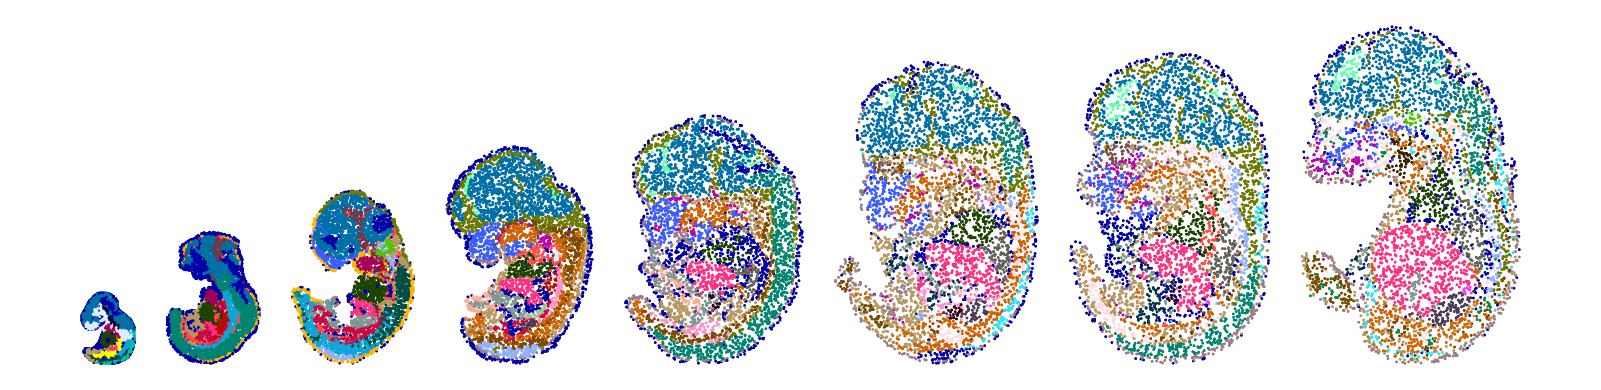

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


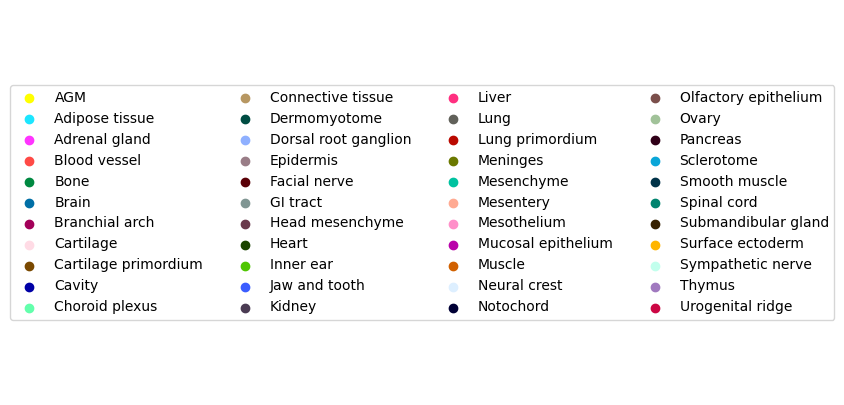

In [4]:
import squidpy as sq
import matplotlib.pyplot as plt

ax = sq.pl.spatial_scatter(ad.concat(plot_list), shape=None, color=['annotation'], figsize=(20,4), ncols=1, colorbar=False, return_ax=True)


all_handles_labels = []

ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
for handle, label in zip(handles, labels):
    if label not in [l for _, l in all_handles_labels]:
        if (label != '0.0') & (label != '1.0') & (label != 'True') & (label != 'False') & (label != '0'):
            all_handles_labels.append((handle, label))
for spine in ax.spines.values():
    spine.set_visible(False)
ax.legend().remove()
if i > 5:
    ax.set_title('') 
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
    
plt.tight_layout()
plt.subplots_adjust(left=None, right=None, bottom=None, top=None, wspace=0.1, hspace=0.1)

plt.show()

unique_handles_labels =  dict(all_handles_labels).items()

# Create a new figure for the comprehensive legend
fig_legend, ax_legend = plt.subplots(figsize=(10, 5))  # Adjust size as needed
fig_legend.legend(*zip(*unique_handles_labels), loc='center', ncol=4)
ax_legend.axis('off')
plt.show()

In [ ]:
from river.river import River
from river.preprocess import do_slat_pair, get_the_feature, seed_everything
from collections import defaultdict

seed_everything(42)

for i, adata in enumerate(adata_list[1:]):
    _, best =  do_slat_pair(adata_list[0], adata, feature='pca')
    matching_list.append(best[0])
gene_expression, spatial, y, overlap = get_the_feature(adata_list, matching_list)
model = River(gene_expression=gene_expression, spatial=spatial, label=y)
model.train(epoch=100)
ig_attribution, dl_attribution, sl_attribution = model.attribution()
model.summary_attribution(ig_attribution, dl_attribution, sl_attribution, overlap)
model.return_top_k_gene(top_k=200)


np.save('final_rank_temporal', model.final_rank.index.values)
np.save('ig_temporal', model.scores_ig)
np.save('dl_temporal', model.scores_dl)
np.save('sl_temporal', model.scores_sl)

/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


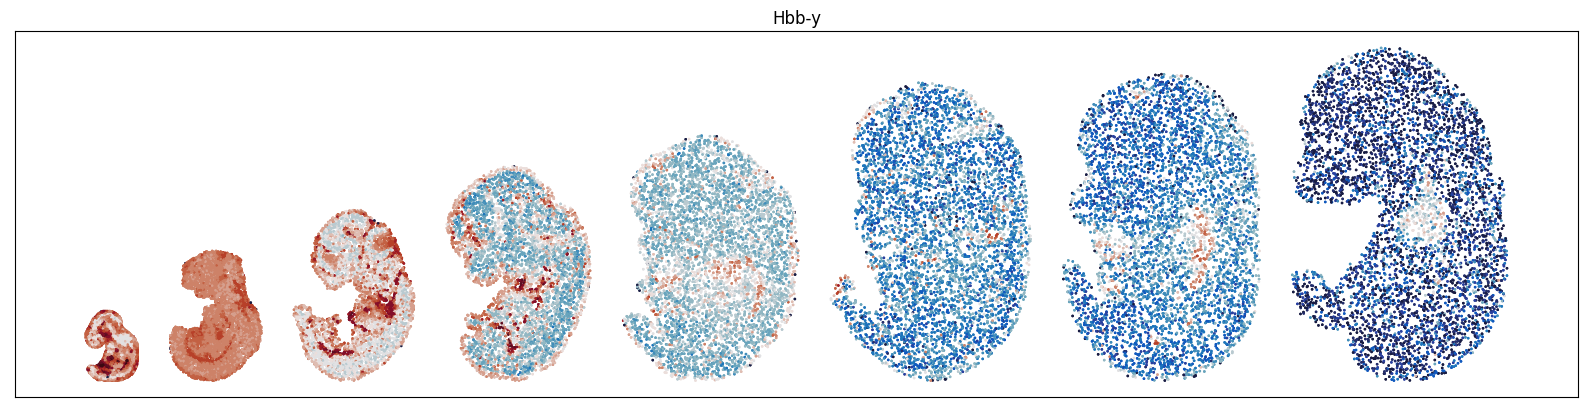

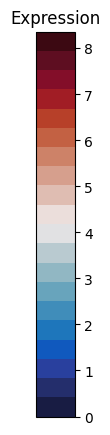

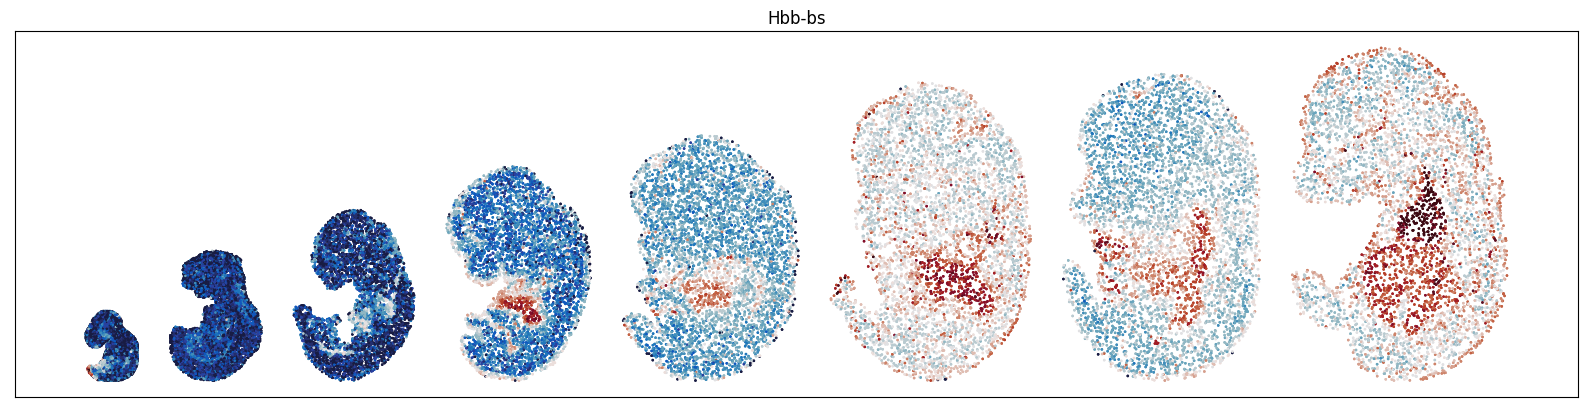

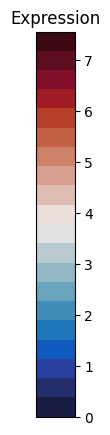

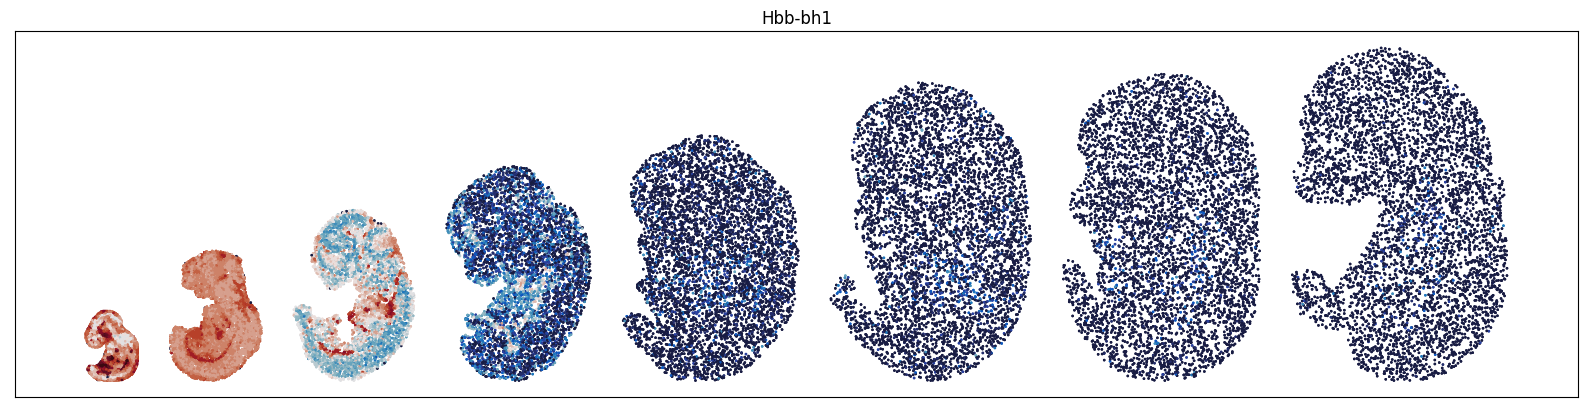

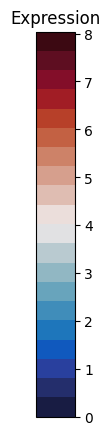

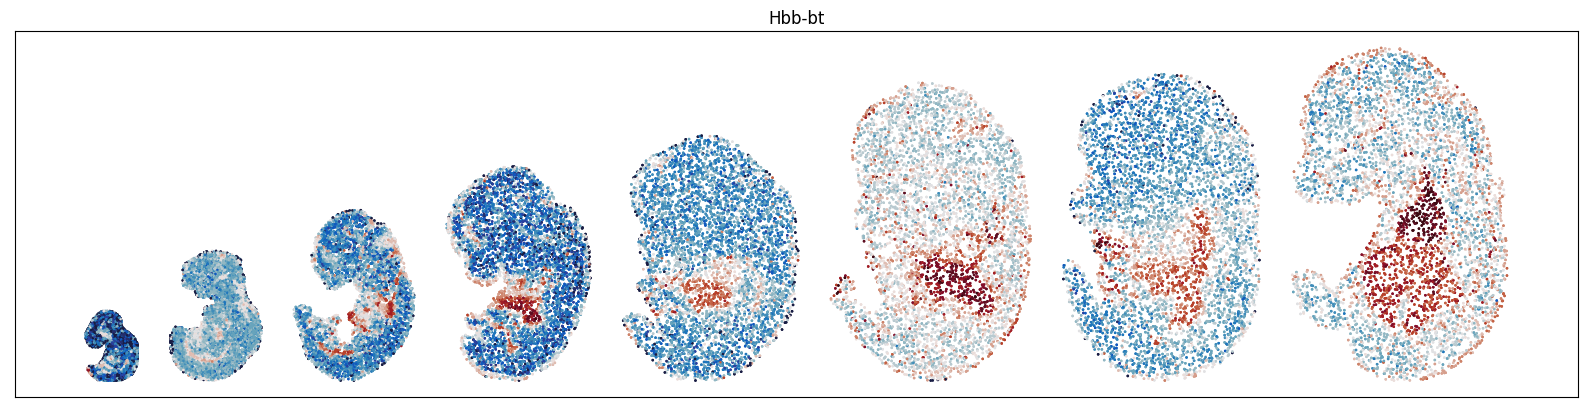

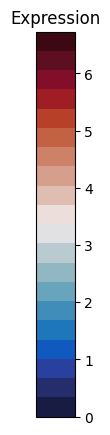

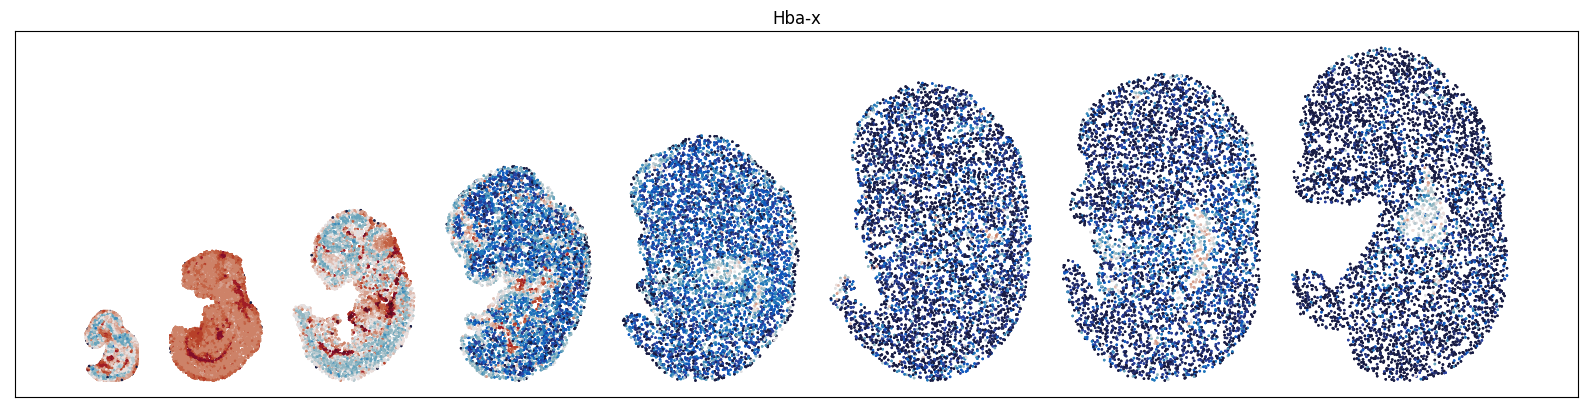

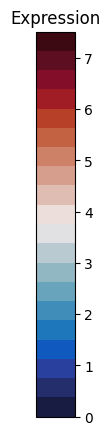

In [19]:
import squidpy as sq

from matplotlib.colors import  ListedColormap
from palettable.cmocean.diverging import Delta_20, Balance_20

final_ranks = np.load('final_rank_temporal.npy', allow_pickle=True)

our_genes = final_ranks[:5].tolist()

for gene in our_genes:
    
    plot = ad.concat(plot_list)
    norm = plt.Normalize(plot[:,gene].X.min(), plot[:, gene].X.max())
    
    cmap = ListedColormap(Balance_20.mpl_colors)
    
    axes = sq.pl.spatial_scatter(ad.concat(plot_list), shape=None, color=[gene], figsize=(20,4), ncols=1, colorbar=False, return_ax=True, cmap=cmap, norm=norm)
    
    axes = [axes]
    
    for ax in axes:
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticklabels([])
        ax.set_yticklabels([])

    plt.show()
    fig_colorbar, ax_colorbar = plt.subplots(figsize=(0.5, 5))
    plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax_colorbar)
    ax_colorbar.set_title('Expression')
    

In [1]:
label_palette = ['#f3f6ed', '#a9c1c8', '#abd064', '#a1cfe6', '#b68e96', '#eebab8', '#EDB11A', '#D75515']

/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/scanpy-1.9.3-py3.10.egg/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque

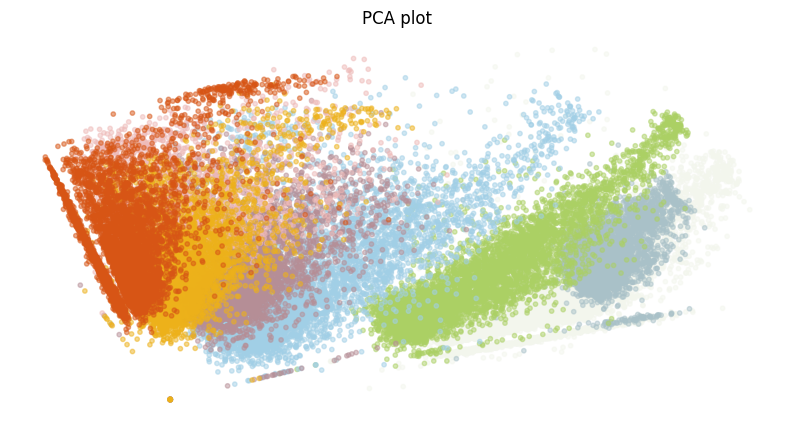

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
import anndata as ad
from sklearn.linear_model import LinearRegression
from matplotlib.colors import ListedColormap

final_ranks = np.load('final_rank_temporal.npy', allow_pickle=True)

our_genes = final_ranks[:5]  # Assuming adata_list is defined somewhere
adata_t = ad.concat(adata_list, label='slice_id')[:, our_genes]

sc.pp.pca(adata_t, n_comps=2)

x = adata_t.obsm['X_pca']
y = adata_t.obs['slice_id'].astype(int).values

fig = plt.figure(figsize=(10, 5))

scatter = plt.scatter(adata_t.obsm['X_pca'][...,0], adata_t.obsm['X_pca'][...,1], c=y, alpha=0.5, s=10, cmap=ListedColormap(label_palette)) 


plt.title('PCA plot')  
ax = plt.gca()

for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.axis(False)

plt.show()

/tmp/ipykernel_3428234/427059068.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Y', y='X', data=df, palette=label_palette, fill=False)
/tmp/ipykernel_3428234/427059068.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Y', y='X', data=df, palette=label_palette, alpha=0.1, dodge=False, s=3)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


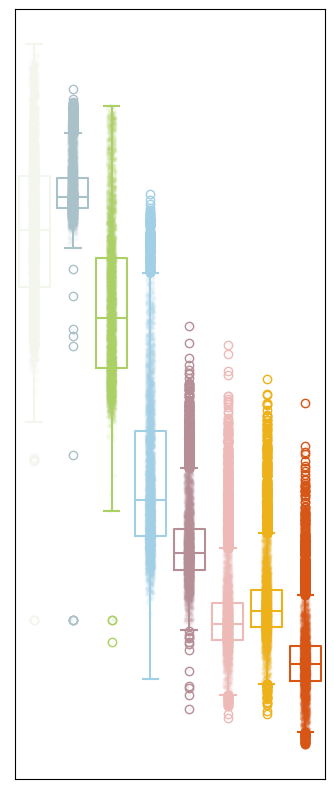

In [22]:

df = pd.DataFrame({'X': adata_t.obsm['X_pca'][...,0], 'Y': y})

plt.figure(figsize=(4, 10))


sns.boxplot(x='Y', y='X', data=df, palette=label_palette, fill=False)

sns.stripplot(x='Y', y='X', data=df, palette=label_palette, alpha=0.1, dodge=False, s=3)
ax = plt.gca()
#plt.title('Box plot with Strip plot for Each Group')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

In [ ]:
import anndata as ad

import pysodb 
import scanpy as sc
sodb = pysodb.SODB()
from numba import jit, njit

adata_list = []
label_list = []
for rank in ['E9.5', 'E10.5', 'E11.5',  'E12.5', 'E13.5', 'E14.5', 'E15.5', 'E16.5']:
    experiment = '{}_E1S1.MOSTA'.format(rank)
    adata = sodb.load_experiment('chen2022spatiotemporal', experiment)
    adata = sc.pp.subsample(adata, n_obs=5000, random_state=0, copy=True)
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)
    adata_list.append(adata)
    label_list.append(rank)
matching_list = []

@njit
def cityblock(a,b,w=None):
    if w is None:
        w = np.ones_like(a)
    return np.mean(np.abs(a-b)*w)

final_ranks = np.load('final_rank_temporal.npy', allow_pickle=True)

our_genes = final_ranks[-5:]  # Assuming adata_list is defined somewhere
adata_t = ad.concat(adata_list, label='slice_id')[:, our_genes]

sc.pp.pca(adata_t)

cond_key = 'slice_id'

from sklearn.metrics import silhouette_samples

siscore_co_occ = np.zeros([len(adata_t.obs[cond_key].cat.categories), len(adata_t.obs[cond_key].cat.categories)], dtype=object)


for i,c1 in enumerate(adata_t.obs[cond_key].cat.categories):
    for j,c2 in enumerate(adata_t.obs[cond_key].cat.categories):
        adata_sub = adata_t[adata_t.obs[cond_key].isin([c1,c2])]
        if i == j:
            siscore_co_occ[i,i] = np.zeros(sum(adata_sub.obs[cond_key]==c1))
        if j <= i:
            continue
        print(i,j,":",c1, c2)
        samples = silhouette_samples(adata_sub.X.toarray(), labels=adata_sub.obs[cond_key], metric=cityblock)
        res1 = samples[adata_sub.obs[cond_key]==c1]
        res2 = samples[adata_sub.obs[cond_key]==c2]
        siscore_co_occ[i,j] = res1
        siscore_co_occ[j,i] = res2
        print(siscore_co_occ[i,j].mean(), siscore_co_occ[j,i].mean())

np.save('bottom.npy', siscore_co_occ)



adata_t = ad.concat(adata_list, label='slice_id')

sc.pp.pca(adata_t)

cond_key = 'slice_id'

from sklearn.metrics import silhouette_samples

siscore_co_occ = np.zeros([len(adata_t.obs[cond_key].cat.categories), len(adata_t.obs[cond_key].cat.categories)], dtype=object)


for i,c1 in enumerate(adata_t.obs[cond_key].cat.categories):
    for j,c2 in enumerate(adata_t.obs[cond_key].cat.categories):
        adata_sub = adata_t[adata_t.obs[cond_key].isin([c1,c2])]
        if i == j:
            siscore_co_occ[i,i] = np.zeros(sum(adata_sub.obs[cond_key]==c1))
        if j <= i:
            continue
        print(i,j,":",c1, c2)
        samples = silhouette_samples(adata_sub.X.toarray(), labels=adata_sub.obs[cond_key], metric=cityblock)
        res1 = samples[adata_sub.obs[cond_key]==c1]
        res2 = samples[adata_sub.obs[cond_key]==c2]
        siscore_co_occ[i,j] = res1
        siscore_co_occ[j,i] = res2
        print(siscore_co_occ[i,j].mean(), siscore_co_occ[j,i].mean())

np.save('full.npy', siscore_co_occ)



our_genes = final_ranks[:5]  # Assuming adata_list is defined somewhere
adata_t = ad.concat(adata_list, label='slice_id')[:, our_genes]

sc.pp.pca(adata_t)

cond_key = 'slice_id'

from sklearn.metrics import silhouette_samples

siscore_co_occ = np.zeros([len(adata_t.obs[cond_key].cat.categories), len(adata_t.obs[cond_key].cat.categories)], dtype=object)


for i,c1 in enumerate(adata_t.obs[cond_key].cat.categories):
    for j,c2 in enumerate(adata_t.obs[cond_key].cat.categories):
        adata_sub = adata_t[adata_t.obs[cond_key].isin([c1,c2])]
        if i == j:
            siscore_co_occ[i,i] = np.zeros(sum(adata_sub.obs[cond_key]==c1))
        if j <= i:
            continue
        print(i,j,":",c1, c2)
        samples = silhouette_samples(adata_sub.X.toarray(), labels=adata_sub.obs[cond_key], metric=cityblock)
        res1 = samples[adata_sub.obs[cond_key]==c1]
        res2 = samples[adata_sub.obs[cond_key]==c2]
        siscore_co_occ[i,j] = res1
        siscore_co_occ[j,i] = res2
        print(siscore_co_occ[i,j].mean(), siscore_co_occ[j,i].mean())

np.save('our.npy', siscore_co_occ)

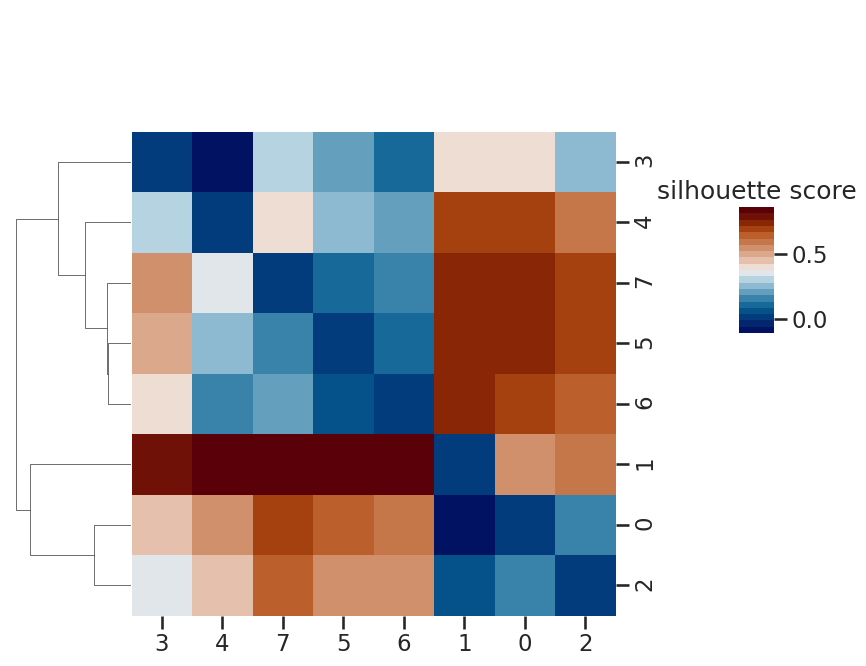

In [23]:
import matplotlib.patches as patches
from matplotlib.lines import Line2D 
import seaborn as sns
from scipy.cluster.hierarchy import linkage, leaves_list

import matplotlib.pyplot as plt

from palettable.lightbartlein.diverging import BlueOrange12_8
from palettable.scientific.diverging   import Vik_20
from matplotlib.colors import  ListedColormap



siscore_mpp = np.load('our.npy', allow_pickle=True)
link = linkage(np.vectorize(np.mean)(siscore_mpp))
idx_order = leaves_list(link)

sns.set_style('ticks')
sns.set_context('talk')
xx, yy = np.meshgrid(range(7), range(7))


adata_t.uns['slice_plot_colors'] = np.array(['#377eb8', '#984ea3', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#999999', '#a34e84'])

# --- intensity
g = sns.clustermap(np.vectorize(np.mean)(siscore_mpp)[:,idx_order], vmin=None, vmax=None, cmap=ListedColormap(Vik_20.mpl_colors)
, yticklabels=adata_t.obs['slice_id'].cat.categories,
              xticklabels=adata_t.obs['slice_id'].cat.categories[idx_order], figsize=(7,7), cbar_pos=(1.08, 0.5, 0.05, 0.18),  row_linkage=link, col_cluster=False,
                  cbar_kws={'orientation':'vertical'})
g.ax_cbar.set_title('silhouette score')



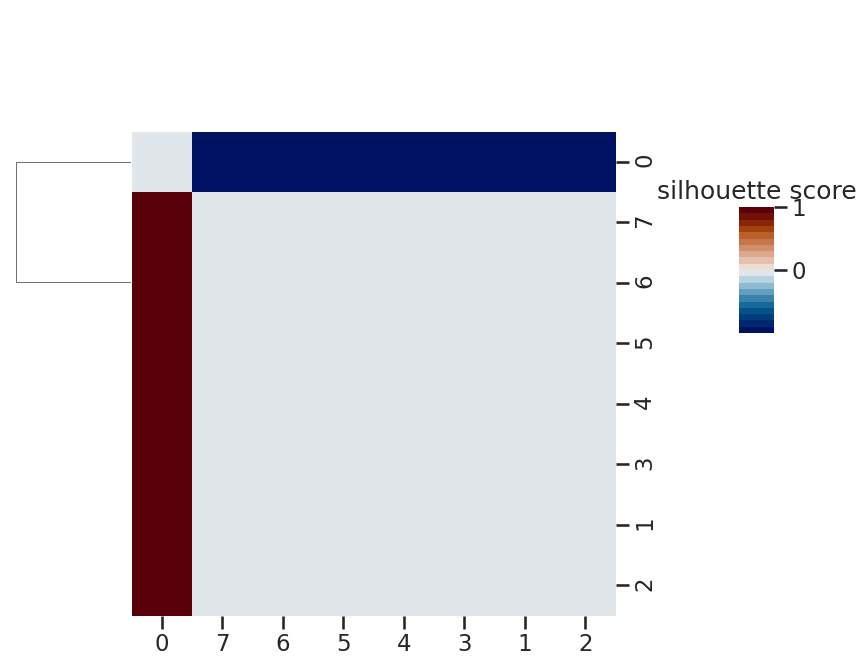

In [24]:
import matplotlib.patches as patches
from matplotlib.lines import Line2D 
import seaborn as sns
from scipy.cluster.hierarchy import linkage, leaves_list

import matplotlib.pyplot as plt


siscore_mpp = np.load('bottom.npy',allow_pickle=True)
link = linkage(np.vectorize(np.mean)(siscore_mpp))
idx_order = leaves_list(link)

sns.set_style('ticks')
sns.set_context('talk')
xx, yy = np.meshgrid(range(7), range(7))


adata_t.uns['slice_plot_colors'] = np.array(['#377eb8', '#984ea3', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#999999', '#a34e84'])

# --- intensity
g = sns.clustermap(np.vectorize(np.mean)(siscore_mpp)[:,idx_order], vmin=None, vmax=None, cmap=ListedColormap(Vik_20.mpl_colors)
, yticklabels=adata_t.obs['slice_id'].cat.categories,
              xticklabels=adata_t.obs['slice_id'].cat.categories[idx_order], figsize=(7,7), cbar_pos=(1.08, 0.5, 0.05, 0.18),  row_linkage=link, col_cluster=False,
                  cbar_kws={'orientation':'vertical'})
g.ax_cbar.set_title('silhouette score')



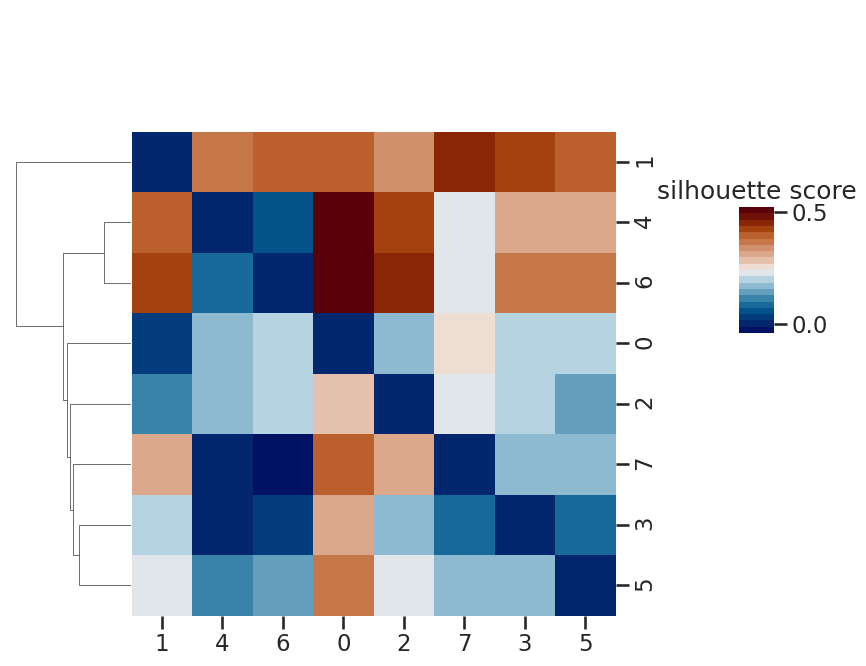

In [25]:
import matplotlib.patches as patches
from matplotlib.lines import Line2D 
import seaborn as sns
from scipy.cluster.hierarchy import linkage, leaves_list

import matplotlib.pyplot as plt


siscore_mpp = np.load('full.npy',allow_pickle=True)
link = linkage(np.vectorize(np.mean)(siscore_mpp))
idx_order = leaves_list(link)

sns.set_style('ticks')
sns.set_context('talk')
xx, yy = np.meshgrid(range(7), range(7))


adata_t.uns['slice_plot_colors'] = np.array(['#377eb8', '#984ea3', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#999999', '#a34e84'])

# --- intensity
g = sns.clustermap(np.vectorize(np.mean)(siscore_mpp)[:,idx_order], vmin=None, vmax=None, cmap=ListedColormap(Vik_20.mpl_colors)
, yticklabels=adata_t.obs['slice_id'].cat.categories,
              xticklabels=adata_t.obs['slice_id'].cat.categories[idx_order], figsize=(7,7), cbar_pos=(1.08, 0.5, 0.05, 0.18),  row_linkage=link, col_cluster=False,
                  cbar_kws={'orientation':'vertical'})
g.ax_cbar.set_title('silhouette score')


In [2]:
import numpy as np 

final_ranks = np.load('final_rank_temporal.npy', allow_pickle=True)

In [16]:
import scib
import anndata as ad

#adata_t = ad.AnnData(X=adata_t.X.toarray(), obs=adata_t.obs)
ari_list = []
nmi_list = []
cg_list = []

final_ranks = np.load('final_rank_temporal.npy', allow_pickle=True)
#sc.tl.tsne(adata_t)
#sc.pl.tsne(adata_t, color='slice_id')
our_genes = final_ranks[:5]  # Assuming adata_list is defined somewhere
adata_t = ad.concat(adata_list, label='slice_id')[:, our_genes]
sc.pp.neighbors(adata_t)
scib.me.cluster_optimal_resolution(adata_t, cluster_key="cluster", label_key="slice_id")
ari_list.append(scib.me.ari(adata_t, cluster_key="cluster", label_key="slice_id"))
nmi_list.append(scib.me.nmi(adata_t, cluster_key="cluster", label_key="slice_id"))
cg_list.append(scib.me.clisi_graph(adata_t, label_key="slice_id", type_="full"))

our_genes = final_ranks[:10]  # Assuming adata_list is defined somewhere
adata_t = ad.concat(adata_list, label='slice_id')[:, our_genes]
sc.pp.neighbors(adata_t)
scib.me.cluster_optimal_resolution(adata_t, cluster_key="cluster", label_key="slice_id")
ari_list.append(scib.me.ari(adata_t, cluster_key="cluster", label_key="slice_id"))
nmi_list.append(scib.me.nmi(adata_t, cluster_key="cluster", label_key="slice_id"))
cg_list.append(scib.me.clisi_graph(adata_t, label_key="slice_id", type_="full"))

our_genes = final_ranks[:15]  # Assuming adata_list is defined somewhere
adata_t = ad.concat(adata_list, label='slice_id')[:, our_genes]
sc.pp.neighbors(adata_t)
scib.me.cluster_optimal_resolution(adata_t, cluster_key="cluster", label_key="slice_id")
ari_list.append(scib.me.ari(adata_t, cluster_key="cluster", label_key="slice_id"))
nmi_list.append(scib.me.nmi(adata_t, cluster_key="cluster", label_key="slice_id"))
cg_list.append(scib.me.clisi_graph(adata_t, label_key="slice_id", type_="full"))

our_genes = final_ranks[:20]  # Assuming adata_list is defined somewhere
adata_t = ad.concat(adata_list, label='slice_id')[:, our_genes]
sc.pp.neighbors(adata_t)
scib.me.cluster_optimal_resolution(adata_t, cluster_key="cluster", label_key="slice_id")
ari_list.append(scib.me.ari(adata_t, cluster_key="cluster", label_key="slice_id"))
nmi_list.append(scib.me.nmi(adata_t, cluster_key="cluster", label_key="slice_id"))
cg_list.append(scib.me.clisi_graph(adata_t, label_key="slice_id", type_="full"))

adata_t =  ad.concat(adata_list, label='slice_id')

sc.pp.neighbors(adata_t)
scib.me.cluster_optimal_resolution(adata_t, cluster_key="cluster", label_key="slice_id")
ari_list.append(scib.me.ari(adata_t, cluster_key="cluster", label_key="slice_id"))
nmi_list.append(scib.me.nmi(adata_t, cluster_key="cluster", label_key="slice_id"))
cg_list.append(scib.me.clisi_graph(adata_t, label_key="slice_id", type_="full"))


our_genes = final_ranks[-5:]
adata_t = ad.concat(adata_list, label='slice_id')[:, our_genes]
sc.pp.neighbors(adata_t)
scib.me.cluster_optimal_resolution(adata_t, cluster_key="cluster", label_key="slice_id")
ari_list.append(scib.me.ari(adata_t, cluster_key="cluster", label_key="slice_id"))
nmi_list.append(scib.me.nmi(adata_t, cluster_key="cluster", label_key="slice_id"))
cg_list.append(scib.me.clisi_graph(adata_t, label_key="slice_id", type_="full"))

/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


resolution: 0.1, nmi: 0.18103679857927862
resolution: 0.2, nmi: 0.19462708637853648
resolution: 0.3, nmi: 0.2521572145973653
resolution: 0.4, nmi: 0.2535351411526279
resolution: 0.5, nmi: 0.27056137214736237
resolution: 0.6, nmi: 0.2932291664167334
resolution: 0.7, nmi: 0.3055749127750919
resolution: 0.8, nmi: 0.3168974385892567
resolution: 0.9, nmi: 0.32956562206041917
resolution: 1.0, nmi: 0.33479482669176464
resolution: 1.1, nmi: 0.341397945419776
resolution: 1.2, nmi: 0.3481918572764056
resolution: 1.3, nmi: 0.351531402255588
resolution: 1.4, nmi: 0.3558624526436134
resolution: 1.5, nmi: 0.3657096023148417
resolution: 1.6, nmi: 0.3574993692970866
resolution: 1.7, nmi: 0.3586138024387358
resolution: 1.8, nmi: 0.3620592359676066
resolution: 1.9, nmi: 0.35338515102207224
resolution: 2.0, nmi: 0.36035340398926596
optimised clustering against slice_id
optimal cluster resolution: 1.5
optimal score: 0.3657096023148417


/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


resolution: 0.1, nmi: 0.0
resolution: 0.2, nmi: 0.00021241032531086094
resolution: 0.3, nmi: 0.0037245241534387937
resolution: 0.4, nmi: 0.0014307463085259067
resolution: 0.5, nmi: 0.0012370395815805707
resolution: 0.6, nmi: 0.0017490170296709927
resolution: 0.7, nmi: 0.0022224390765742414
resolution: 0.8, nmi: 0.0027430698142884924
resolution: 0.9, nmi: 0.0029403877504554127
resolution: 1.0, nmi: 0.003611371074365425
resolution: 1.1, nmi: 0.0037248421635662212
resolution: 1.2, nmi: 0.003880366332980241
resolution: 1.3, nmi: 0.00449945091160496
resolution: 1.4, nmi: 0.004617645087505024
resolution: 1.5, nmi: 0.004727358372515725
resolution: 1.6, nmi: 0.005154711927362887
resolution: 1.7, nmi: 0.005300785407359462
resolution: 1.8, nmi: 0.005884044271240531
resolution: 1.9, nmi: 0.00599475856409588
resolution: 2.0, nmi: 0.006048120816864686
optimised clustering against slice_id
optimal cluster resolution: 2.0
optimal score: 0.006048120816864686


/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [28]:
np.save('ari_fig4', ari_list)
np.save('nmi_fig4', nmi_list)
np.save('cg_fig4', cg_list)

In [28]:
color_map = {str(i) : e for i, e in enumerate(label_palette)}

/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/scanpy-1.9.3-py3.10.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


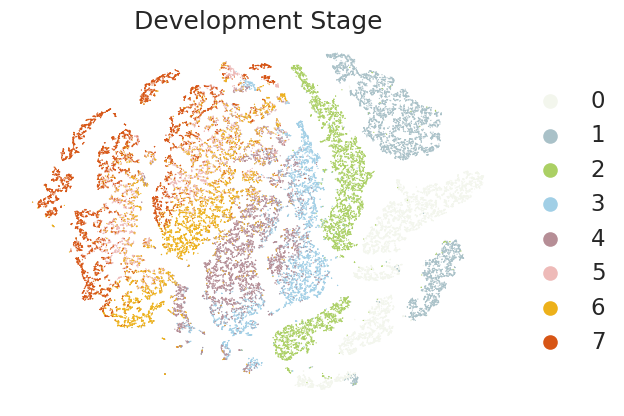

/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/scanpy-1.9.3-py3.10.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


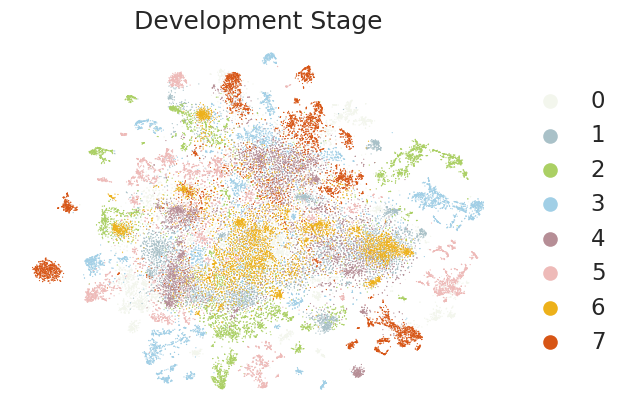

/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/civy/miniconda3/lib/python3.10/site-packages/scanpy-1.9.3-py3.10.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


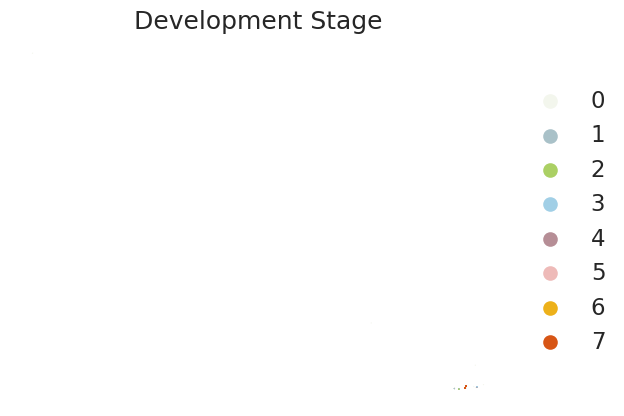

In [30]:

adata_t =  ad.concat(adata_list, label='Development Stage')[:, final_ranks[:5]]
adata_t = ad.AnnData(X=adata_t.X.toarray(), obs=adata_t.obs)
sc.tl.tsne(adata_t)
ax = sc.pl.tsne(adata_t, color='Development Stage', show=False, palette=color_map)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

adata_all =  ad.concat(adata_list, label='Development Stage')
adata_all.X = adata_all.X.toarray()
sc.tl.tsne(adata_all)
ax = sc.pl.tsne(adata_all, color='Development Stage', show=False, palette=color_map)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

adata_t = ad.concat(adata_list, label='Development Stage')[:, final_ranks[-5:]]
adata_t = ad.AnnData(X=adata_t.X.toarray(), obs=adata_t.obs)
sc.tl.tsne(adata_t)
ax = sc.pl.tsne(adata_t, color='Development Stage', show=False,  palette=color_map)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


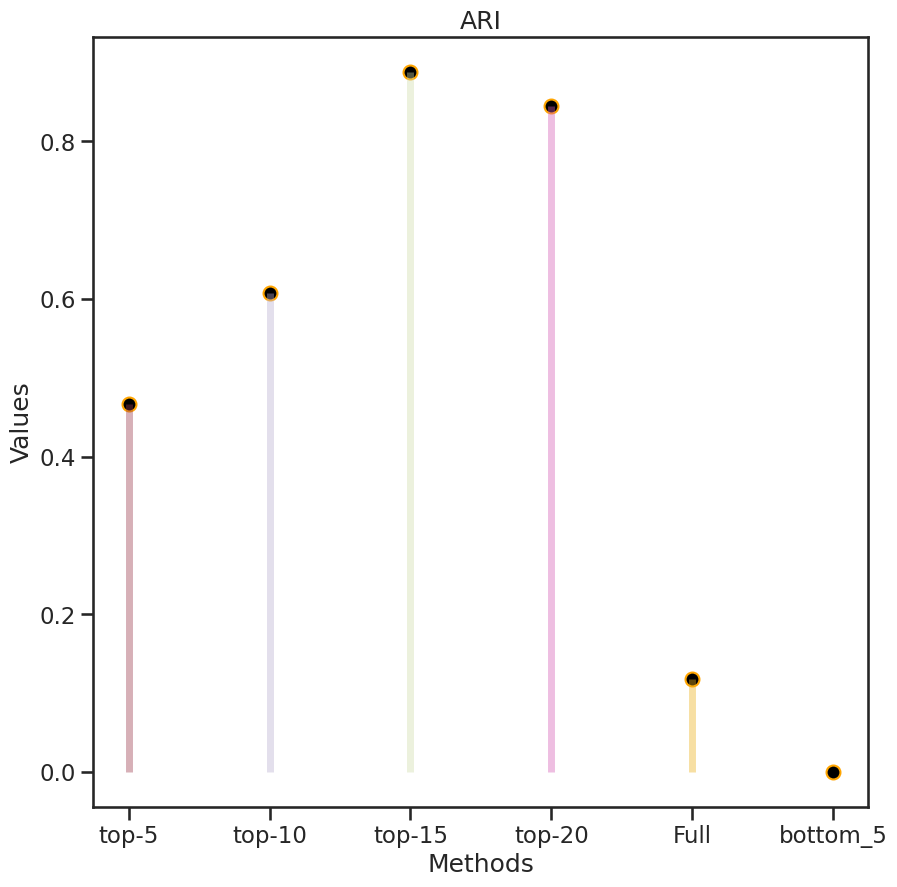

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


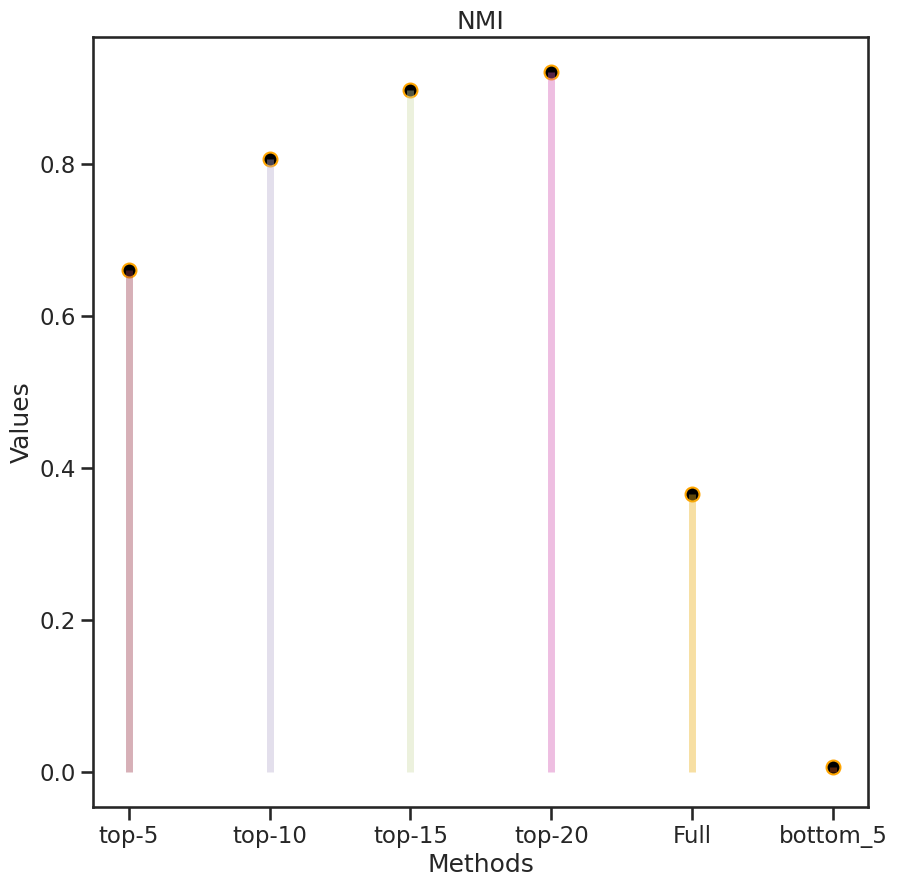

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


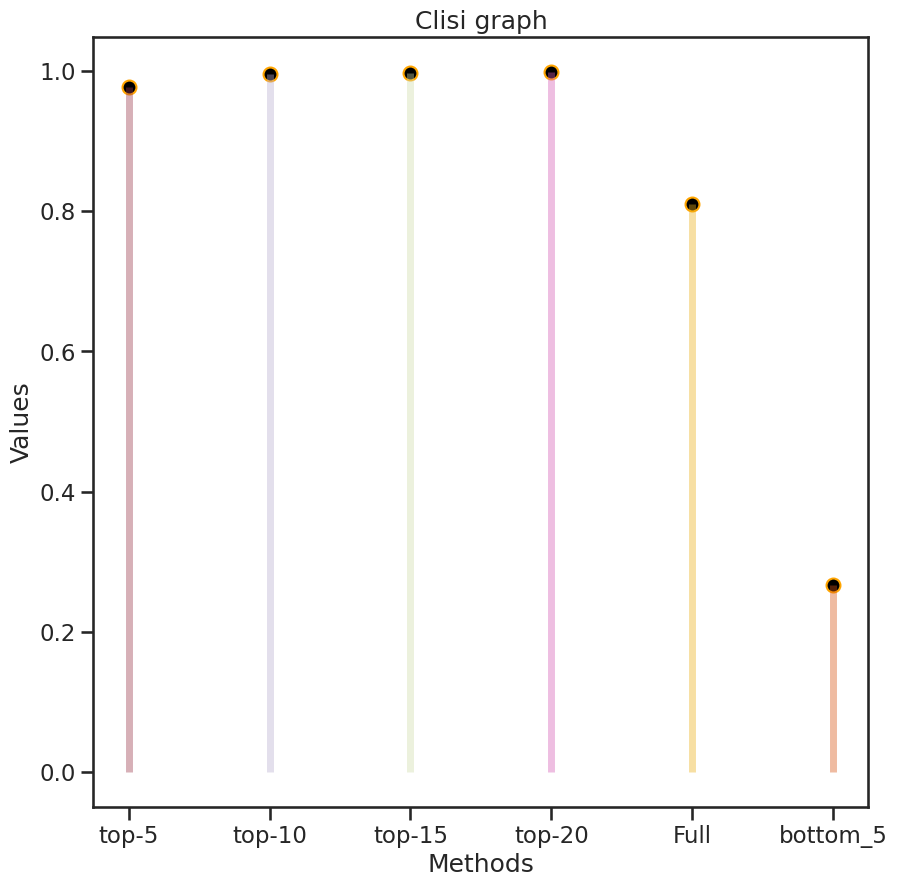

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Defining the method names and loading the data
methods = ['top-5', 'top-10', 'top-15', 'top-20', 'Full', 'bottom_5']
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink']  # Different colors for each stem

colors = ['#9B3A4D', '#BAAFD1', '#D0DCAA', '#D55EB6', '#EDB11A', '#D75515']

with plt.rc_context({"figure.figsize": (10, 10)}):
    # Plot each set of values
    for i, (data_file, title) in enumerate(zip(['ari_fig4.npy', 'nmi_fig4.npy', 'cg_fig4.npy'],
                                ['ARI', 'NMI', 'Clisi graph'])):
        values = np.load(data_file)
        
        index = np.argmax(values)
        color =  ['grey'] * values.shape[0]
        color[index] = 'red'
        x = np.arange(values.shape[0])
        y = values
        plt.vlines(x=x, ymin=0, ymax=y, color=colors, alpha=0.4, linewidth=5)
        plt.scatter(x, y, color='black', s=100, alpha=1, marker='o', edgecolors='orange')

        # Adding labels and title
        plt.xlabel('Methods')
        plt.ylabel('Values')
        plt.xticks(x, methods)
        plt.title(f'{title}')
        plt.show()


In [ ]:
from river.river import River
from river.preprocess import do_slat_pair, get_the_feature, seed_everything
from collections import defaultdict

seed_everything(42)

for i, adata in enumerate(adata_list[1:]):
    _, best =  do_slat_pair(adata_list[0], adata, feature='pca')
    matching_list.append(best[0])
gene_expression, spatial, y, overlap = get_the_feature(adata_list, matching_list)
gene_expression = (gene_expression > 0).astype(int)
model = River(gene_expression=gene_expression, spatial=spatial, label=y)
model.train(epoch=100)
ig_attribution, dl_attribution, sl_attribution = model.attribution()
model.summary_attribution(ig_attribution, dl_attribution, sl_attribution, overlap)
model.return_top_k_gene(top_k=200)

import numpy as np

np.save('final_rank_temporal_binary', model.final_rank.index.values)
np.save('ig_temporal_binary', model.scores_ig)
np.save('dl_temporal_binary', model.scores_dl)
np.save('sl_temporal_binary', model.scores_sl)

In [ ]:
import squidpy as sq

from matplotlib.colors import  ListedColormap
from palettable.cmocean.diverging import Delta_20, Balance_20
import anndata as ad

import matplotlib.pyplot as plt

final_ranks = np.load('final_rank_temporal.npy', allow_pickle=True)

#our_genes = final_ranks[:5].tolist()

#final_ranks = np.load('final_rank_temporal.npy', allow_pickle=True)

final_ranks_2 = np.load('final_rank_temporal_binary.npy', allow_pickle=True)

our_genes = list(set(final_ranks_2[:10]) - set(final_ranks[:10]))


for gene in our_genes:
    
    plot = ad.concat(plot_list)
    norm = plt.Normalize(plot[:,gene].X.min(), plot[:, gene].X.max())
    
    cmap = ListedColormap(Balance_20.mpl_colors)
    
    plot_adata = ad.concat(plot_list)

    plot_adata.X = (plot_adata.X > 0)

    plot_adata.obs['express'] = plot_adata[:, gene].X.astype(int).toarray()

    plot_adata.obs['express'] = plot_adata.obs['express'].astype('category')

    res_palette = ['#486d9e', '#d99343']

    axes = sq.pl.spatial_scatter(plot_adata, shape=None, color=['express'], figsize=(20,4), ncols=1, colorbar=False, return_ax=True,  palette=ListedColormap(res_palette))#, norm=norm)
    
    axes = [axes]
    
    for ax in axes:
        ax.set_title(gene)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        
    #plt.savefig(f'/data/civy/lvm-DE-reproducibility/new_figure/fig_3_gene_viz_{gene}.eps', bbox_inches='tight', pad_inches=0.0)
    #fig_colorbar, ax_colorbar = plt.subplots(figsize=(0.5, 5))
    #plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax_colorbar)
    #ax_colorbar.set_title('Expression')
    
    #fig_colorbar.savefig(f'/data/civy/lvm-DE-reproducibility/new_figure/fig_3_gene_cmap_{gene}.eps', bbox_inches='tight', pad_inches=0.0)    

    

In [ ]:
import gseapy as gp
import pandas as pd

import gseapy as gp
import pandas as pd

# Load your ranked gene list

final_ranks = np.load('final_rank_temporal.npy', allow_pickle=True)

#our_genes = final_ranks[:5].tolist()

#final_ranks = np.load('final_rank_temporal.npy', allow_pickle=True)

final_ranks_2 = np.load('final_rank_temporal_binary.npy', allow_pickle=True)

gene_list = list(set(final_ranks_2[:50]) - set(final_ranks[:50]))


#gene_list = final_ranks[:20].tolist()

# Define the reference gene set
gene_sets = 'GO_Biological_Process_2023'  # Adjust as needed

#gene_sets  = 'KEGG_2019_Mouse'

# Run GSEA using Prerank
enr = gp.enrich(gene_list=gene_list, # or gene_list=glist
                 gene_sets=gene_sets, # kegg is a dict object
                 background=None, # or "hsapiens_gene_ensembl", or int, or text file, or a list of genes
                 outdir=None,
                 verbose=True)
# Accessing the results
results = enr.res2d
print(results.head())
results.to_csv('gsea_kegg_mouse_results.csv')

# Plotting a Dotplot of the GSEA results
gp.dotplot(results, title='GSEA Dotplot', cutoff=0.05, # Adjust the significance cutoff as needed
           color_bar_label='Normalized Enrichment Score (NES)', size=10)

# Plotting a Barplot of the GSEA results
gp.barplot(results, title='GSEA Barplot', cutoff=0.05, # Adjust the significance cutoff as needed
           color_bar_label='Normalized Enrichment Score (NES)')
